# Type of relationship with classes

In discrete maths we study graphs and sets, some of the most used tools are the relationships between a set A with a graph G represented in a ordered pair set, this set can represent other things though. 

Some of the relationships that can be in such set are the followiong:
* Reflexive: for every a element in A there must be (a,a) pair in G
* Symmetric: for every (a,b) in G there must exist an (b,a) pair
* Antisymmetric: in this relationship there must not exist ordered paris that are mirror like within G
* Transitive: for all (a,b) and (b,c) pairs there must exist an (a,c) pair in G

This relationships must be checked to tell if a set G is from equivalence or partial order.
* Equivalence relation: G must be reflexive, symmetric and transitive
* Partial order relation: G must be reflexive, antisymmetric and transitive

In [1]:
class relation:
    def __init__(self,A,R):
        self.a = A
        self.r = R
        # Types of relationship declared
        self.reflexive()
        self.symmetric()
        self.antisymmetric()
        self.transitive()
        self.is_equivalence()
        self.is_order()

        # Partitions and class of equivalence declared
        self.eq_partitions()
        self.eq_clas()

    # Reflexive relationship check
    def reflexive(self):
        # We add a empyt list to add the missing ordered pairs so the relationship will be reflexive
        mis_rel_r = []
        # We check al the elements of the A set with a for cycle
        for a in self.a:
            # If there are not all the ordered pairs (a,a) for every a in A then we add the missing pair to the list
            if (a,a) not in self.r:
                m_rel = (a,a); mis_rel_r.append(m_rel)
                # We print that it is not reflexive and the list with the missing pairs
                return ("No es reflexiva porque faltan las relaciones: "+ str(mis_rel_r))
        # In case all the elements in the set A have ordered pairs in the relationship we return a True
        return True
    
    # Symmetric relationship check
    def symmetric(self):
        # Same as before we create an empty list to nest the missing pairs so R could be symmetric
        mis_rel_s = []
        for a, b in self.r:
            # For every ordered pair (a,b) there must exist an (b,a) pair
            if (b, a) not in self.r:
                # if there is not such pair (b,a) it will be added from the cycle to the list
                m_rel = (b,a); mis_rel_s.append(m_rel)
                # if there is a single ordered pair in the missing list it wont be symmetric
                return ("No es simétrica porque faltan las relaciones: "+str(mis_rel_s))
        # if all the pairs (a,b) have one (b,a) then we have a True 
        return True

    # Antisymmetric relationship check
    def antisymmetric(self):
        # Other empty list but this time we'll add the pairs that already exist in R
        mis_rel_as = []
        for a in self.a:
            # We check for every a in A if exist (a,a)
            for a, b in self.r:
                # and if for (a,b) there is no (b,a)
                if (a,b) in self.r and (b,a) in self.r and a != b:
                    m_rel = [(a,b),(b,a)]; mis_rel_as.append(m_rel)
                    return ("No es antisimétrica porque existen las relaciones: "+str(mis_rel_as))
        return True
    # Transitive relationship check
    def transitive(self):
        # in this case we must see if there is a (a,c) pair for (a,b) and (b,c) in R
        tran_rel = []
        mis_rel_t = []
        for a in self.a:
            # for every a and b in A we want to check if there is a transition (a,b) to (b,c) so exist (a,c)
            for b in self.a:
                if (a, b) in self.r:
                    for c in self.a:
                        # in case ther is no such (a,c) pair it will be added with the corresponding (a,b) and (b,c) pairs
                        if (b, c) in self.r and (a, c) not in self.r:
                            t_rel = [(a,b), (b,c)] ;m_rel = (a,c)
                            tran_rel.append(t_rel); mis_rel_t.append(m_rel) 
                            return ("No es transitiva porque para las relaciones "+str(tran_rel)+" faltan las relaciones "+str(mis_rel_t))
        return True

    # Equivalence relationship check 
    # an equivalence relation must be reflexive, symmetric and transitive
    def is_equivalence(self):
        # first we create a list with the values of reflexive, symmetric and reflexive check
        eq = [self.reflexive(), self.symmetric(), self.transitive()]
        # and we also have a empty list were it'll added the non checked type of relationship
        l_not =[]
        miss_not = []
        # if all the values inside the list are not True then the relationship is not of equivalence
        if eq != [True, True, True]:
            # for each check on the list we want to know the ones that are not True, then add them to a list
            if eq[0] != True:
                l_not.append("reflexiva")
                miss_not.append(self.reflexive())
            elif eq[1] != True:
                l_not.append("simétrica")
                miss_not.append(self.symmetric())
            elif eq[2] != True:
                l_not.append("transitiva")
                miss_not.append(self.transitive())
            return ("La relación no es de equivalencia por qué no es: " + str(l_not)+". "
            + str(miss_not))
        else:
            return True

    # print the equivalence graph
    def equivalence_graph(self):
        # for this task we will use the networkx library for python
        import networkx as nx
        # we declare a directed graph
        G = nx.DiGraph(directed= True)
        # and add its edges from R
        G.add_edges_from(self.r)
        # if the value of is_equivalence is not True we will say it's not of equivalene
        if self.is_equivalence() != True:
            p = "No es posible mostrar el grafo pues no es relación de equivalencia"
        else:
            # else we will print the graph
            p = nx.draw_networkx(G, node_color='black', node_size=600, font_size= 15, font_color='yellow', with_labels=True, arrowsize=18, edge_color='green')
        
        return p

    # partitions of equivalence relationship 
    def eq_partitions(self):
        import networkx as nx
        # for this we need to use once again networkx library
        G = nx.DiGraph()
        # we create a graph with egdes from R
        G.add_edges_from(self.r)

        # we create an empty list that will recieve the a of the (a,b) ordered pairs from R
        xs = []
        for x,y in self.r:
            xs.append(x)
        # to drop duplicates we turn the list to a set and back again to a list
        xs = list(set(xs))
        # the next step is create a list with the relations of A with its same elements, this is represente in R
        tex = []
        # in this cycle we create sublists of elements of A related to, same again, elements of A
        for i in xs:
            z = [n for n in G.neighbors(i)]
            tex.append(z)  
        # there are missing the dictionaries that relate the values on A to the list of relations in R
        parts = {}
        keys = range(len(tex))
        # this cycle adds the related values with their lists
        for j in keys:
            parts[j+1] = tex[j]
        # if the value of is_equivalence is not True it won't print the dictionary of partitions
        if self.is_equivalence() != True:
            return ("No es posible mostrar las particiones pues no es relación de equivalencia")
        
        return parts

    # equivalence class
    def eq_clas(self):
    # is a set of all partitions subsets
    # we will use once again networkx
        import networkx as nx

        G = nx.DiGraph()
        G.add_edges_from(self.r)
        # we use the same method for the partitions
        xs = []
        for x,y in self.r:
            xs.append(x)

        xs = list(set(xs))

        tex = []
        for i in xs:
            z = [n for n in G.neighbors(i)]
            tex.append(z)

        if self.is_equivalence() != True:
            return ("No es posible mostrar la clase de equivalencia pues no es relación de equivalencia")
        # this time we don't want a dictionary but a set of subsets
        # in the tex list we will have all the tuples turned into a set
        # and then we have a set of unique sets
        return {tuple(x) for x in tex}
    # partial order relationship
    def is_order(self):
        # for R to be of partial order 
        or_p = [self.reflexive(), self.antisymmetric(), self.transitive()]
        p_not = []
        p_mis = []
        if or_p != [True, True, True]:
            if or_p[0] != True:
                p_not.append("reflexiva")
                p_mis.append(self.reflexive())
            elif or_p[1] != True:
                p_not.append("antisimétrica")
                p_mis.append(self.antisymmetric())
            elif or_p[2] != True:
                p_not.append("transitiva")
                p_mis.append(self.transitive())
            return ("La relación no es de orden parcial por qué no es: " + str(p_not)+". "
            + str(p_mis))
        else:
            return True
       
    def order_graph(self):
        
        import networkx as nx
        import random
        
        result = {}
        for a,b in self.r:
            result.setdefault(a,[]).append(b)

        result_list = []
        for a,b in self.r:
            result_list.append(a and b)

        primes = []
        for num in result_list:
            prime = True
            for i in range(2,num):
                if (num%i == 0 ):
                    prime = False
            if prime:
                primes.append(num)

        edges = {}
        rl_reverse = list(result_list)
        for a in rl_reverse:
            for b in rl_reverse:
                if (a%b==0) and (a!=b):
                    edges.setdefault(a,[]).append(b)
        
        edges_list = [(x,y) for x,y in self.r if x!=y]
        for i in list(range(1,10)):
            for a,b in edges_list:
                if b in list(edges.keys()):
                    for z in edges[b]:
                        if (z!=a) and (z%a==0):
                            while (a,b) in edges_list:
                                edges_list.remove((a,b))

        pos = {}
        randlist = list(range(1,len(list(result.keys()))+1))
        for a in (list(result.keys())):
            if a==1:
                pos.setdefault(a, ((len(list(result.keys()))/2), -len(list(result.keys()))*2-4))
            elif a in primes:
                pos.setdefault(a, (a, -len(list(result.keys()))*2))
            elif len(list(result[a])) == 1:
                exitr = random.choice(randlist)
                pos.setdefault(a,(exitr, 0))
                randlist.remove(exitr)
            else:
                exitr = random.choice(randlist)
                pos.setdefault(a, (exitr, (-len(list(result[a])))*2))
                randlist.remove(exitr)

        T = nx.Graph()
        T.add_nodes_from(list(pos.keys()))
        T.add_edges_from(edges_list)
        
        if self.is_order() != True:
            p = "No es posible mostrar el grafo pues no es relación de orden"
        else: 
            p = nx.draw(T, pos, node_color='black', node_size=600, font_size= 15, font_color='yellow', with_labels=True, arrowsize=18, edge_color='green')
        return p
        


In case G is of equivalence there must be presented de equivalence class with it's respective graph, in case it's of partial order the graph of G must be shown.

In [2]:
A1 = [1,2,3]
R1 = [(1,1),(1,3),(2,1),(2,2),(3,3),(2,3)] # Par Ord rel

R2 = [(1,1),(1,2),(2,1),(2,2),(3,3)] # Eq. rel

A2 = [1,2,3,4]
R3 = [(1,1),(2,2),(3,3),(4,4),(1,2),(2,1),(1,3),(3,1),(1,4),(4,1),(4,2),(2,4)] # None

A3 = [1,2,3]
R4 = [(1,1),(1,2),(1, 3),(2,2),(2,3),(3,2),(3,3),(2,1),(3,1)]

A4= [0,1,2,3]
R5= [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0),(2,2),(3,3)]

A5 = ["a","b","c","d"]
R6=[('a','a'), ('a','d'), ('d','d'),('d','a'), ('b','b'),('b','c'), ('c','c'), ('c','b')]

A6 = [1,2,3,4]
R7 = [(1,2),(1,3),(2,3),(2,4),(3,1)]
R8 = [(2,1),(3,1),(4,1),(1,3)]

A7 = [1,2,3,4,5,6,7,8,9]
R9 = [(1,1),(1,2),(1,3),(1,4),(1,5),(1,7),(1,8),(1,9),(2,2),(2,4),(2,6),(2,8),(3,3),(3,6),(3,9),(4,4),(4,8),(5,5),(6,6),(7,7),(8,8),(9,9)]

A8 = [1,2,3,4,5,6,7]
R10= [(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(2,2),(2,4),(2,5),(2,6),(2,7),(3,3),(3,4),(3,5),(3,6),(3,7),(4,4),(4,6),(4,7),(5,5),(5,6),(5,7),(6,6),(6,7),(7,7)]

In [3]:
S1 = relation(A1,R1)
S1.is_equivalence(), S1.is_order()

("La relación no es de equivalencia por qué no es: ['simétrica']. ['No es simétrica porque faltan las relaciones: [(3, 1)]']",
 True)

In [4]:
S1.eq_clas()

'No es posible mostrar la clase de equivalencia pues no es relación de equivalencia'

In [5]:
S1.eq_partitions()

'No es posible mostrar las particiones pues no es relación de equivalencia'

In [6]:
S2 = relation(A1,R2)
S2.is_equivalence(), S2.is_order()

(True,
 "La relación no es de orden parcial por qué no es: ['antisimétrica']. ['No es antisimétrica porque existen las relaciones: [[(1, 2), (2, 1)]]']")

In [7]:
S2.eq_partitions()

{1: [1, 2], 2: [1, 2], 3: [3]}

In [8]:
S2.eq_clas()

{(1, 2), (3,)}

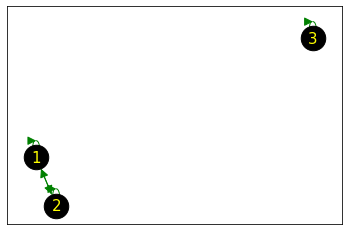

In [9]:
S2.equivalence_graph()

In [10]:
S2.eq_partitions()

{1: [1, 2], 2: [1, 2], 3: [3]}

In [11]:
S2.eq_clas()

{(1, 2), (3,)}

In [12]:
S3 = relation(A2,R3)
S3.is_equivalence(),S3.is_order()

("La relación no es de equivalencia por qué no es: ['transitiva']. ['No es transitiva porque para las relaciones [[(2, 1), (1, 3)]] faltan las relaciones [(2, 3)]']",
 "La relación no es de orden parcial por qué no es: ['antisimétrica']. ['No es antisimétrica porque existen las relaciones: [[(1, 2), (2, 1)]]']")

In [13]:
S4 = relation(A3,R4)
S4.is_equivalence(),S4.is_order()

(True,
 "La relación no es de orden parcial por qué no es: ['antisimétrica']. ['No es antisimétrica porque existen las relaciones: [[(1, 2), (2, 1)]]']")

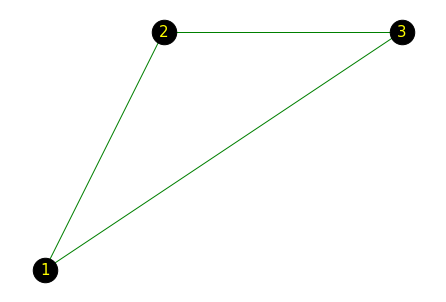

In [14]:
S1.order_graph()

In [15]:
S5 = relation(A5,R6)
S5.is_order()

'La relación no es de orden parcial por qué no es: [\'antisimétrica\']. ["No es antisimétrica porque existen las relaciones: [[(\'a\', \'d\'), (\'d\', \'a\')]]"]'

In [16]:
S5.is_equivalence()

True

In [17]:
S8 = relation(A8,R10)

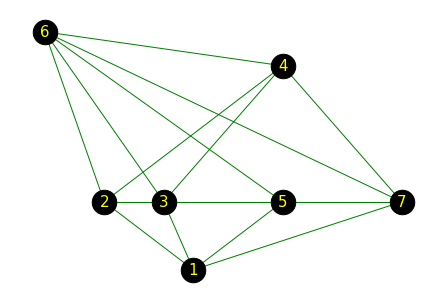

In [18]:
S8.order_graph()

In [19]:
S8.is_order()

True